In [2]:
import pickle

In [3]:
with open("tag_domain_edgelist.pkl", "rb") as fp:
    edgelist = pickle.load(fp)

In [4]:
edgelist[:10]

[('visa', 'academia', 79),
 ('job-search', 'academia', 937),
 ('journals', 'academia', 1490),
 ('journals', 'or', 2),
 ('journals', 'matheducators', 2),
 ('journals', 'stats', 18),
 ('engineering', 'electronics', 46),
 ('engineering', 'academia', 241),
 ('copyright', 'buddhism', 3),
 ('copyright', 'gamedev', 155)]

In [5]:
import networkx as nx
from networkx.algorithms import bipartite

#DomainDomain_ProjectionGraph

In [6]:
BipartiteGraph = nx.Graph()
BipartiteGraph.add_weighted_edges_from(edgelist)

# Creating adjacency list of the bipartite graph 
(This Adjacency List a list of tuples, were first element of the tuple is a node, say n1, and 2nd element of the tuple is a dictionary which maps all the nodes that n1 is connected to, to the weights with which they are connected)

In [7]:
BipartiteGraph_AdjList = [(n, nbrdict) for n, nbrdict in BipartiteGraph.adjacency()]

In [9]:
BipartiteGraph_AdjList[:10]

[('visa', {'academia': {'weight': 79}}),
 ('academia',
  {'visa': {'weight': 79},
   'job-search': {'weight': 937},
   'journals': {'weight': 1490},
   'engineering': {'weight': 241},
   'copyright': {'weight': 406},
   'arxiv': {'weight': 335},
   'bibliometrics': {'weight': 149},
   'graduate-school': {'weight': 1742},
   'germany': {'weight': 262},
   'books': {'weight': 295},
   'career-path': {'weight': 1050},
   'job': {'weight': 491},
   'reference-request': {'weight': 272},
   'grades': {'weight': 260},
   'software': {'weight': 206},
   'citations': {'weight': 1695},
   'language': {'weight': 174},
   'student-exchange': {'weight': 33},
   'seminars': {'weight': 72},
   'community': {'weight': 33},
   'science': {'weight': 140},
   'open-access': {'weight': 193},
   'teaching': {'weight': 1040},
   'literature': {'weight': 68},
   'reading': {'weight': 85},
   'publishers': {'weight': 243},
   'coursework': {'weight': 248},
   'teaching-assistant': {'weight': 210},
   'postdoc

In [11]:
BipartiteGraph_AdjList[0]

('visa', {'academia': {'weight': 79}})

In [12]:
BipartiteGraph_AdjList[1]

('academia',
 {'visa': {'weight': 79},
  'job-search': {'weight': 937},
  'journals': {'weight': 1490},
  'engineering': {'weight': 241},
  'copyright': {'weight': 406},
  'arxiv': {'weight': 335},
  'bibliometrics': {'weight': 149},
  'graduate-school': {'weight': 1742},
  'germany': {'weight': 262},
  'books': {'weight': 295},
  'career-path': {'weight': 1050},
  'job': {'weight': 491},
  'reference-request': {'weight': 272},
  'grades': {'weight': 260},
  'software': {'weight': 206},
  'citations': {'weight': 1695},
  'language': {'weight': 174},
  'student-exchange': {'weight': 33},
  'seminars': {'weight': 72},
  'community': {'weight': 33},
  'science': {'weight': 140},
  'open-access': {'weight': 193},
  'teaching': {'weight': 1040},
  'literature': {'weight': 68},
  'reading': {'weight': 85},
  'publishers': {'weight': 243},
  'coursework': {'weight': 248},
  'teaching-assistant': {'weight': 210},
  'postdocs': {'weight': 1032},
  'workflow': {'weight': 32},
  'note-taking': {'

In [13]:
len(BipartiteGraph_AdjList)

11145

# Creating Hashmap and Inverse Hashmap

In [14]:
hashed_edgelist = []
hashmap = {}
inverse_hashmap = {}
i = 0
for edgetuple in edgelist:
    if edgetuple[0] not in hashmap:
        hashmap[edgetuple[0]] = i
        inverse_hashmap[i] = edgetuple[0]
        i+=1
    if edgetuple[1] not in hashmap:
        hashmap[edgetuple[1]] = i
        inverse_hashmap[i] = edgetuple[1]
        i+=1
        
#print(hashmap)

In [15]:
hashmap[edgelist[0][0]]  ## edgelist[0][0] = 29108

0

In [16]:
hashmap[edgelist[0][1]]  ## edgelist[0][1] = "academia"

1

In [17]:
hashmap['academia']

1

In [18]:
hashmap[edgelist[1][0]]  ## edgelist[1][0] = 318519

2

In [29]:
hashmap[edgelist[1][1]]  ## edgelist[0][2] = "academia"

1

In [19]:
BipartiteGraph_AdjList[hashmap[edgelist[0][1]]][1].keys() ## All the users edgelist[0][1] i.e 'academia' is connected to

dict_keys(['visa', 'job-search', 'journals', 'engineering', 'copyright', 'arxiv', 'bibliometrics', 'graduate-school', 'germany', 'books', 'career-path', 'job', 'reference-request', 'grades', 'software', 'citations', 'language', 'student-exchange', 'seminars', 'community', 'science', 'open-access', 'teaching', 'literature', 'reading', 'publishers', 'coursework', 'teaching-assistant', 'postdocs', 'workflow', 'note-taking', 'preprint', 'reputation', 'collaboration', 'tools', 'application', 'phd', 'chemistry', 'time-management', 'authorship', 'correspondence', 'personal-name', 'conference', 'advisor', 'mentoring', 'research-process', 'europe', 'online-resource', 'funding', 'salary', 'networking', 'undergraduate', 'recommendation-letter', 'professors', 'graduate-admissions', 'lab-meeting', 'cv', 'education', 'presentation', 'writing', 'email', 'etiquette', 'industry', 'interview', 'research-misconduct', 'international', 'working-time', 'masters', 'peer-review', 'travel', 'research-undergrad

In [20]:
type(list(BipartiteGraph_AdjList[hashmap['buddhism']][1].keys())[1])

str

# Building the domain-domain projection network w.r.t Tags

In [22]:
DomainsList = []
for eachtuple in edgelist :
    if eachtuple[1] not in DomainsList:
        DomainsList.append(eachtuple[1])

In [23]:
DomainsList

['academia',
 'or',
 'matheducators',
 'stats',
 'electronics',
 'buddhism',
 'gamedev',
 'economics',
 'chinese',
 'chemistry',
 'robotics',
 'cs',
 'islam',
 'music',
 'quant',
 'datascience',
 'hermeneutics',
 'hinduism',
 'scicomp',
 'linguistics',
 'physics',
 'russian',
 'french',
 'cseducators',
 'tor',
 'spanish']

In [24]:
ProjectionNetwork = nx.Graph()

In [25]:
ProjectionNetwork.add_nodes_from(DomainsList)

In [26]:
#BipartiteGraph.add_weighted_edges_from(edgelist) edgelist is a list of edgetuples
for i in range(len(DomainsList)-1):
    print(DomainsList[i])
    for j in range(i+1,len(DomainsList)):
        #print(DomainsList[j])
        Domain1 = DomainsList[i]
        Domain2 = DomainsList[j]
        hashedDomain1 = hashmap[Domain1]
        #print(hashedDomain1)
        hashedDomain2 = hashmap[Domain2]
        #print(hashedDomain2)
        #We want to calculate the edgeweight between Domain1 and Domain2 in the projection Network
        
        
        #Find the list of common neighbours between Domain1 and Domain2
        Dict1_of_Neighbours = BipartiteGraph_AdjList[hashedDomain1][1]
        Dict2_of_Neighbours = BipartiteGraph_AdjList[hashedDomain2][1]
        List1 = list(Dict1_of_Neighbours.keys())
        List2 = list(Dict2_of_Neighbours.keys())
        List_of_Common_Neighbours = list(set(List1) & set(List2))
        
        #Each common user contributes something to the total edgeweight between Domain1 and Domain2
        #We find how important each commonuser is to domain1 and to domain2 and multiply the normalised importance
        #to get the contribution to total edgeweight between Domain1 and Domain2 by each commonuser.
        edgeweight = 0
        for commonUser in List_of_Common_Neighbours:
            importance1 = BipartiteGraph_AdjList[hashedDomain1][1][commonUser]['weight']
            importance2 = BipartiteGraph_AdjList[hashedDomain2][1][commonUser]['weight']
            
            sum1 = 0
            for users in List1:
                sum1 += BipartiteGraph_AdjList[hashedDomain1][1][users]['weight']
            sum2 = 0
            for users in List2:
                sum2 += BipartiteGraph_AdjList[hashedDomain2][1][users]['weight']
                
            normalised_importance1 = importance1/sum1
            normalised_importance2 = importance2/sum2
            
            edgeweight += normalised_importance1*normalised_importance1
            
        if edgeweight !=0:
            ProjectionNetwork.add_edge(Domain1, Domain2, weight=edgeweight)

academia
or
matheducators
stats
electronics
buddhism
gamedev
economics
chinese
chemistry
robotics
cs
islam
music
quant
datascience
hermeneutics
hinduism
scicomp
linguistics
physics
russian
french
cseducators
tor


Done in few seconds

In [27]:
edges = ProjectionNetwork.edges()
pos = nx.spring_layout(ProjectionNetwork)

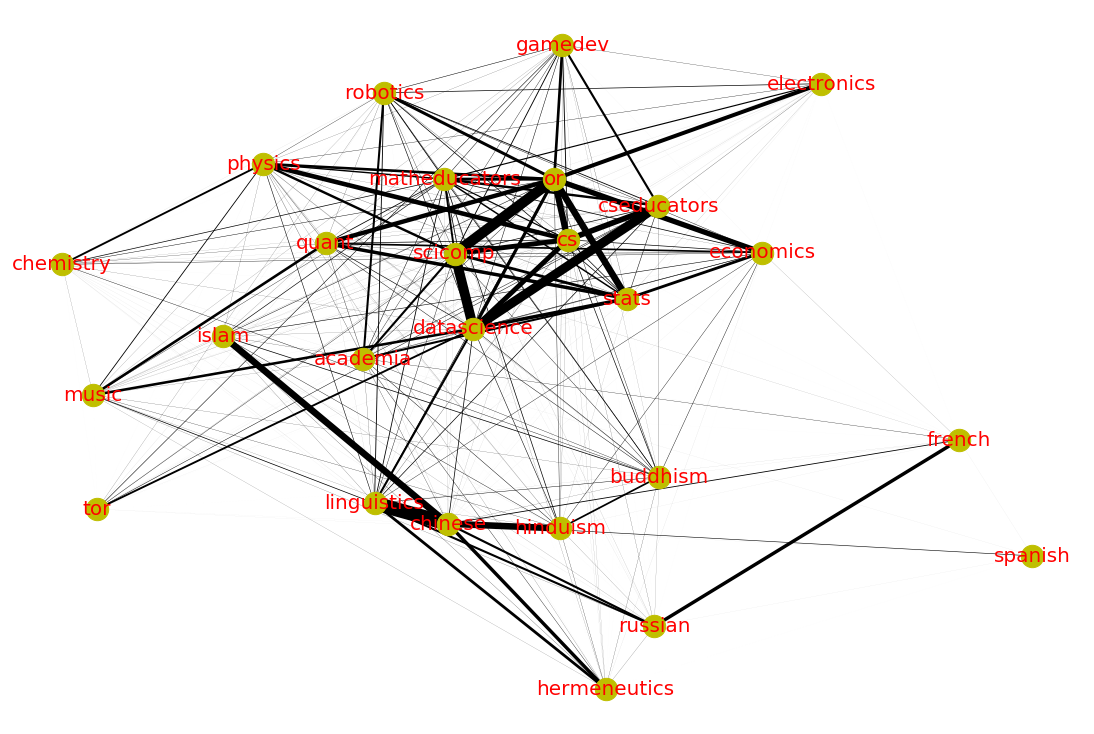

In [28]:
import matplotlib.pyplot as plt

weights = [ProjectionNetwork[u][v]['weight']*500 for u,v in edges]

plt.figure(figsize=(15,10))
nx.draw(ProjectionNetwork, edges=edges, width=weights, with_labels = True, node_size = 500, node_color = 'y', font_color = 'r', font_size = 20)
plt.savefig('DomainDomainProjection_TAGS.png')
plt.show()

# Running LOUVAIN Community Detection Algorithm

In [29]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
from community import community_louvain
partition = community_louvain.best_partition(ProjectionNetwork, resolution = 0.7)

In [51]:
partition

{'academia': 0,
 'or': 1,
 'matheducators': 2,
 'stats': 1,
 'electronics': 1,
 'buddhism': 3,
 'gamedev': 4,
 'economics': 1,
 'chinese': 3,
 'chemistry': 2,
 'robotics': 0,
 'cs': 4,
 'islam': 3,
 'music': 2,
 'quant': 1,
 'datascience': 4,
 'hermeneutics': 3,
 'hinduism': 3,
 'scicomp': 4,
 'linguistics': 3,
 'physics': 2,
 'russian': 3,
 'french': 3,
 'cseducators': 4,
 'tor': 4,
 'spanish': 3}